<a href="https://www.analytiksinc.com">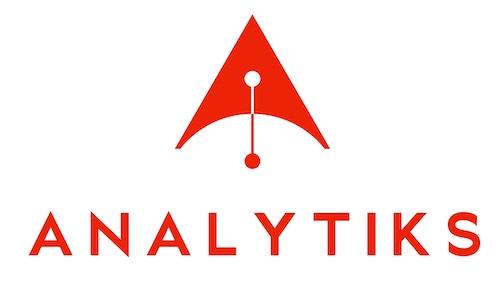</a>
<p style="text-align: right;"> © 2020. Analytiks Inc. </p>

# Exercise: Predicting Student's Grade

<b>Dataset:</b> <i>xAPI-Edu-Data.csv</i><br>
<a href="https://www.kaggle.com/aljarah/xAPI-Edu-Data/downloads/students-academic-performance-dataset.zip/6">Description</a>

<b>Target Variable:</b> <i>Class</i> 
* L = Low
* M = Medium
* H = High

<b>Key Objectives:</b>
1. Convert Categorical to Numerical Data
2. Create a Parameter_Grid for GridSearch_CV and include the following parameters:
    1. n_estimators
    2. max_depth
    3. max_features
    4. min_samples_split
    5. min_samples_leaf
    6. bootstrap
    7. criterion
3. Create a GridSearchCV with Pipeline to Perform the following functions:
    1. Scaler: MinMax 
    2. Classifier: RandomForestClassifier (random_state = 35)
4. Show the following results:
    1. Best Estimator
    2. Best Parameters
    3. Best Score
    4. Top 10 Feature Importance
    
<b><i>Bonus: Give 1 or 2 Insights that you can get from the Dataset</b></i>

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Additional Libraries

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler

## Load dataset

In [4]:
df = pd.read_csv('../Datasets/xAPI-Edu-Data.csv')

In [5]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [7]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


### Separate predictor & target variables

<i>Hint: Since we'll be using GridSearchCV, no need to further split into train and test set. Only split into predictor and target variables</i>

In [8]:
df_pred = df.drop('Class', axis=1)
df_target = df['Class']

In [9]:
df_pred

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7


In [10]:
df_target

0      M
1      M
2      L
3      L
4      M
      ..
475    L
476    M
477    M
478    L
479    L
Name: Class, Length: 480, dtype: object

### Check class balance

In [11]:
df_target.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

## Convert the Categorical Data to Numerical

Hint: Use the "getdummies" function in pandas

In [12]:
df_pred = pd.get_dummies(df_pred)
df_pred

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,20,20,3,25,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,10,7,0,30,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,1,0,0,0,0,1,...,0,1,1,0,1,0,1,0,1,0
476,50,77,14,28,1,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
477,55,74,25,29,1,0,0,0,0,1,...,0,1,1,0,1,0,1,0,0,1
478,30,17,14,57,1,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0


In [13]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   raisedhands                    480 non-null    int64
 1   VisITedResources               480 non-null    int64
 2   AnnouncementsView              480 non-null    int64
 3   Discussion                     480 non-null    int64
 4   gender_F                       480 non-null    uint8
 5   gender_M                       480 non-null    uint8
 6   NationalITy_Egypt              480 non-null    uint8
 7   NationalITy_Iran               480 non-null    uint8
 8   NationalITy_Iraq               480 non-null    uint8
 9   NationalITy_Jordan             480 non-null    uint8
 10  NationalITy_KW                 480 non-null    uint8
 11  NationalITy_Lybia              480 non-null    uint8
 12  NationalITy_Morocco            480 non-null    uint8
 13  NationalITy_Palestin

## Grid Search CV

### Setup Pipeline to include Scaler, and the Classifier

* Scaler: MinMax
* Classifier: RandomForestclassifier (random_state=35)

In [14]:
steps = [('scaler', MinMaxScaler()), ('clf', RandomForestClassifier(random_state=35))]
pipeline = Pipeline(steps)

### Create paramater dictionary for Grid Search of Random Forest Classifier
Refer to: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">RandomForestClassifier</a> for parameters

<i> Hint: Since were using a Pipeline, do not forget to include the label prefix in your param_grid</i>

In [15]:
param_grid = {'clf__criterion': ['gini'], 
             'clf__min_samples_split': [10], 
             'clf__max_features': ['auto'],
             'clf__min_samples_leaf': [1,2,4,6,8]}

### Setup GridSearchCV with the Pipeline created

* GridSearch <br>
*Hint: the Pipeline should be inside the GridSearchCV function*
* set parameter cv = 5<br>
* set parameter iid = False

In [16]:
grid_pipe = GridSearchCV(pipeline, param_grid, iid=False, cv=5)
grid_pipe

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=35))]),
             iid=False,
             param_grid={'clf__criterion': ['gini'],
                         'clf__max_features': ['auto'],
                         'clf__min_samples_leaf': [1, 2, 4, 6, 8],
                         'clf__min_samples_split': [10]})

### Build the model
Grid Search CV will build multiple models with different combinations of Random Forest parameters defined in param_grid

In [17]:
model = grid_pipe.fit(df_pred, df_target)

### Show Results

### Print out the following:
* Best Estimator
* Best Parameters
* Best Score

### Validate Best Model and Print results

In [18]:
model.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf',
                 RandomForestClassifier(min_samples_leaf=6,
                                        min_samples_split=10,
                                        random_state=35))])

In [19]:
model.best_params_

{'clf__criterion': 'gini',
 'clf__max_features': 'auto',
 'clf__min_samples_leaf': 6,
 'clf__min_samples_split': 10}

In [20]:
model.best_score_

0.725

### Display the top 10 Feature Importance ranked from highest to lowest

Step:<br>
1. Access the "best_estimator_" from the Grid Search
2. Access the RandomForestClassifier from the pipeline in best_estimator_ (Hint: use the "named_steps" attribute)


<AxesSubplot:>

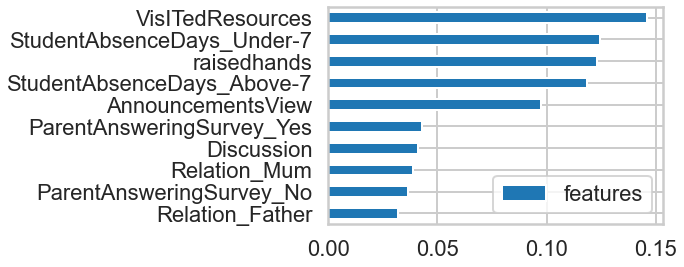

In [21]:
pd.DataFrame(model.best_estimator_['clf'].feature_importances_, \
             index=df_pred.columns, columns=['features']) \
.nlargest(10, 'features').sort_values('features') \
.plot(kind='barh')

## Bonus: Give 1 or 2 Insights that you can get from the Dataset

In [22]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   raisedhands                    480 non-null    int64
 1   VisITedResources               480 non-null    int64
 2   AnnouncementsView              480 non-null    int64
 3   Discussion                     480 non-null    int64
 4   gender_F                       480 non-null    uint8
 5   gender_M                       480 non-null    uint8
 6   NationalITy_Egypt              480 non-null    uint8
 7   NationalITy_Iran               480 non-null    uint8
 8   NationalITy_Iraq               480 non-null    uint8
 9   NationalITy_Jordan             480 non-null    uint8
 10  NationalITy_KW                 480 non-null    uint8
 11  NationalITy_Lybia              480 non-null    uint8
 12  NationalITy_Morocco            480 non-null    uint8
 13  NationalITy_Palestin